In [1]:
# The code was removed by Watson Studio for sharing.

,COLUMN_0,NAME,ALBUM,ARTIST,RELEASE_DATE,LENGTH,POPULARITY,DANCEABILITY,ACOUSTICNESS,ENERGY,INSTRUMENTALNESS,LIVENESS,LOUDNESS,SPEECHINESS,VALENCE,TEMPO
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


In [2]:
!pip install -U sqlalchemy==1.3.9 
!pip install -U ibm_db_sa 
!pip install -U ipython-sql 
!pip install -U ibm-db 
import ibm_db

In [3]:
%load_ext sql

In [4]:
%sql ibm_db_sa://nhy87814:17F78ArgrrTbqIql@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB?security=SSL

In [43]:
%%sql

/* finding the 5 most popular Taylor Swift songs */

select name as "top_5_popular_songs", popularity from SPOTIFY_TAYLORSWIFT order by popularity desc limit 5;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


top_5_popular_songs,popularity
Blank Space,82
Shake It Off,80
Lover,80
Delicate,78
You Need To Calm Down,78


In [44]:
%%sql

/* finding the most popular song per album */

select t.album, t.name, t.popularity 
from (
   select album, max(popularity) as mostpopular
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.popularity = x.mostpopular order by popularity desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity
1989 (Deluxe),Blank Space,82
Lover,Lover,80
reputation,Delicate,78
Fearless (Taylor's Version),You Belong With Me (Taylor’s Version),76
Red (Deluxe Edition),All Too Well,72
evermore (deluxe version),right where you left me - bonus track,72
folklore (deluxe version),cardigan,65
folklore (deluxe version),august,65
folklore (deluxe version),the lakes - bonus track,65
Speak Now (Deluxe Package),Mine,64


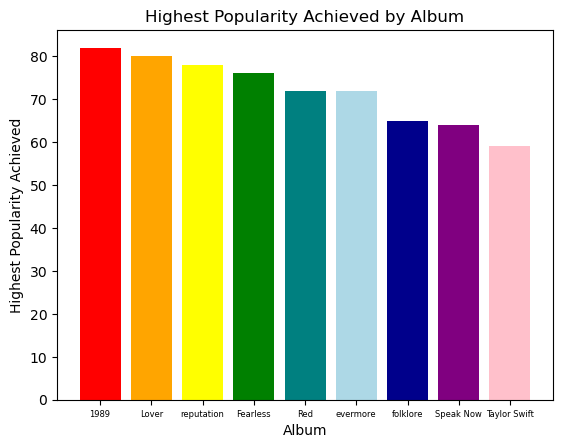

In [73]:
#plotting the highest popularity achieved for each album 
import matplotlib.pyplot as plt

album = ["1989","Lover","reputation","Fearless","Red","evermore","folklore","Speak Now","Taylor Swift"]
maxpopularity = [82,80,78,76,72,72,65,64,59]
newcolors = ['red','orange','yellow','green','teal','lightblue','darkblue','purple','pink']

plt.bar(album, maxpopularity,color = newcolors)
plt.title('Highest Popularity Achieved by Album')
plt.xlabel('Album')
plt.ylabel('Highest Popularity Achieved')
plt.xticks(fontsize=6)
plt.show()

In [26]:
%%sql

select t.album, t.name, t.popularity, t.length 
from (
   select album, max(length) as longestsong
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.length = x.longestsong order by length desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,length
Speak Now (Deluxe Package),Dear John,48,403887
Red (Deluxe Edition),All Too Well,72,329160
evermore (deluxe version),happiness,64,315146
Fearless (Taylor's Version),Untouchable (Taylor’s Version),62,312107
folklore (deluxe version),betty,62,294520
Lover,Daylight,68,293453
1989 (Deluxe),Clean,63,271000
Taylor Swift,Tied Together with a Smile,47,248106
reputation,End Game,72,244826


-0.2661306353446868


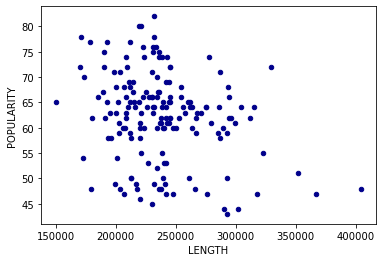

In [46]:
#finding the correlation between popularity and length and using a scatterplot to visualize the relationship between the two variables

popularity = df_data_1["POPULARITY"]
length = df_data_1["LENGTH"]
correlation_length = popularity.corr(length)
print(correlation_length)
ax1 = df_data_1.plot.scatter(x = 'LENGTH',y = 'POPULARITY',c = 'DarkBlue')

In [47]:
%%sql

/* finding the song for each album that has the highest danceability */

select t.album, t.name, t.popularity, t.danceability 
from (
   select album, max(danceability) as mostdanceable
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.danceability = x.mostdanceable order by danceability desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,danceability
Lover,I Think He Knows,70,0.897
Red (Deluxe Edition),Treacherous - Original Demo Recording,53,0.828
1989 (Deluxe),Clean,63,0.815
reputation,Gorgeous,72,0.800
Fearless (Taylor's Version),Hey Stephen (Taylor’s Version),66,0.788
folklore (deluxe version),the 1,64,0.780
Speak Now (Deluxe Package),Never Grow Up,44,0.715
evermore (deluxe version),closure,62,0.689
Taylor Swift,Our Song,54,0.668


0.2065274775511306


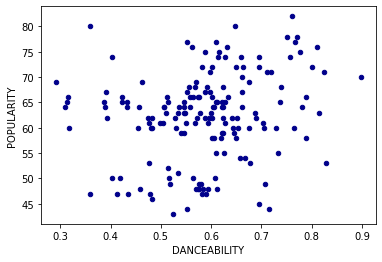

In [48]:
#finding the correlation between popularity and danceability and using a scatterplot to visualize the relationship between the two variables

danceability = df_data_1["DANCEABILITY"]
correlation_dance = popularity.corr(danceability)
print(correlation_dance)
ax1 = df_data_1.plot.scatter(x = 'DANCEABILITY',y = 'POPULARITY',c = 'DarkBlue')

In [49]:
%%sql

/* finding the song for each album that has the highest acousticness */

select t.album, t.name, t.popularity, t.acousticness 
from (
   select album, max(acousticness) as mostacoustic
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.acousticness = x.mostacoustic order by acousticness desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,acousticness
Lover,It’s Nice To Have A Friend,65,0.971000
folklore (deluxe version),hoax,60,0.964000
evermore (deluxe version),evermore (feat. Bon Iver),64,0.937000
reputation,New Year’s Day,67,0.921000
Fearless (Taylor's Version),We Were Happy (Taylor’s Version) (From The Vault),65,0.849000
Speak Now (Deluxe Package),Haunted - Acoustic Version,48,0.841000
1989 (Deluxe),You Are In Love,62,0.707000
Red (Deluxe Edition),State Of Grace - Acoustic,55,0.664000
Taylor Swift,Invisible,48,0.637000


0.013457637743668585


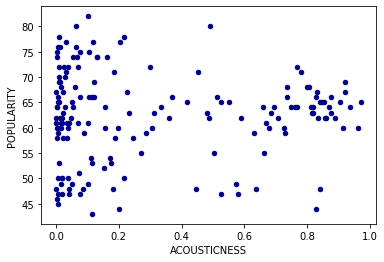

In [50]:
#finding the correlation between popularity and acousticness and using a scatterplot to visualize the relationship between the two variables

acousticness = df_data_1["ACOUSTICNESS"]
correlation_acoustic = popularity.corr(acousticness)
print(correlation_acoustic)
ax1 = df_data_1.plot.scatter(x = 'ACOUSTICNESS',y = 'POPULARITY',c = 'DarkBlue')

In [28]:
%%sql

/* finding the song for each album that has the highest energy */

select t.album, t.name, t.popularity, t.energy 
from (
   select album, max(energy) as mostenergy
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.energy = x.mostenergy order by energy desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,energy
Speak Now (Deluxe Package),Haunted,47,0.944
Taylor Swift,I'm Only Me When I'm With You,50,0.934
Fearless (Taylor's Version),Tell Me Why (Taylor’s Version),63,0.909
Red (Deluxe Edition),Red - Original Demo Recording,53,0.902
1989 (Deluxe),I Wish You Would,60,0.893
Lover,ME! (feat. Brendon Urie of Panic! At The Disco),77,0.830
reputation,This Is Why We Can't Have Nice Things,68,0.789
evermore (deluxe version),long story short,64,0.730
folklore (deluxe version),mad woman,61,0.700


-0.0588856289039933


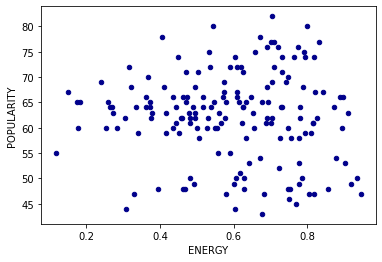

In [13]:
#finding the correlation between popularity and energy and using a scatterplot to visualize the relationship between the two variables

energy = df_data_1["ENERGY"]
correlation_energy = popularity.corr(energy)
print(correlation_energy)
ax1 = df_data_1.plot.scatter(x = 'ENERGY',y = 'POPULARITY',c = 'DarkBlue')

In [29]:
%%sql

/* finding the song for each album that has the highest instrumentalness */

select t.album, t.name, t.popularity, t.instrumentalness 
from (
   select album, max(instrumentalness) as mostinstrumental
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.instrumentalness = x.mostinstrumental order by instrumentalness desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,instrumentalness
evermore (deluxe version),long story short,64,0.17900000
Red (Deluxe Edition),Sad Beautiful Tragic,59,0.03370000
1989 (Deluxe),How You Get The Girl,60,0.00868000
Lover,Miss Americana & The Heartbreak Prince,70,0.00615000
folklore (deluxe version),the last great american dynasty,63,0.00414000
Speak Now (Deluxe Package),The Story Of Us,48,0.00161000
Taylor Swift,I'm Only Me When I'm With You,50,0.00080700
reputation,Delicate,78,0.00035700
Fearless (Taylor's Version),Don’t You (Taylor’s Version) (From The Vault),66,0.00001200


0.032274570513217624


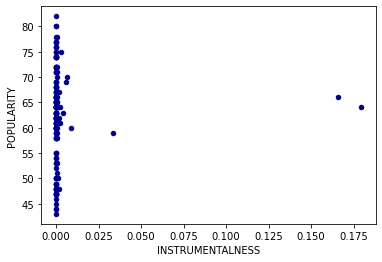

In [14]:
#finding the correlation between popularity and instrumentalness and using a scatterplot to visualize the relationship between the two variables

instrumentalness = df_data_1["INSTRUMENTALNESS"]
correlation_instrumentalness = popularity.corr(instrumentalness)
print(correlation_instrumentalness)
ax1 = df_data_1.plot.scatter(x = 'INSTRUMENTALNESS',y = 'POPULARITY',c = 'DarkBlue')

In [30]:
%%sql

/* finding the song for each album that has the highest liveness */

select t.album, t.name, t.popularity, t.liveness 
from (
   select album, max(liveness) as mostlively
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.liveness = x.mostlively order by liveness desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,liveness
reputation,This Is Why We Can't Have Nice Things,68,0.3820
Speak Now (Deluxe Package),Better Than Revenge,49,0.3590
Fearless (Taylor's Version),Superstar (Taylor’s Version),60,0.3430
1989 (Deluxe),Out Of The Woods,67,0.3410
Taylor Swift,Our Song,54,0.3290
Lover,Death By A Thousand Cuts,71,0.3190
Red (Deluxe Edition),Everything Has Changed,62,0.3110
folklore (deluxe version),cardigan,65,0.2600
evermore (deluxe version),willow,67,0.1450


-0.14695775784907328


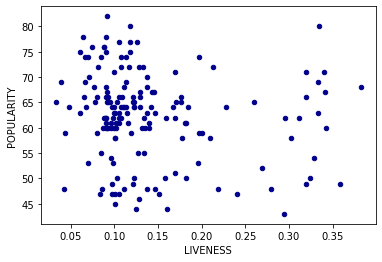

In [15]:
#finding the correlation between popularity and liveness and using a scatterplot to visualize the relationship between the two variables

liveness = df_data_1["LIVENESS"]
correlation_liveness = popularity.corr(liveness)
print(correlation_liveness)
ax1 = df_data_1.plot.scatter(x = 'LIVENESS',y = 'POPULARITY',c = 'DarkBlue')

In [31]:
%%sql

/* finding the song for each album that has the highest loudness */

select t.album, t.name, t.popularity, t.loudness 
from (
   select album, max(loudness) as mostloud
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.loudness = x.mostloud order by loudness desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,loudness
Taylor Swift,Picture To Burn,54,-2.098
Speak Now (Deluxe Package),Haunted,47,-2.641
Fearless (Taylor's Version),Tell Me Why (Taylor’s Version),63,-3.669
Lover,ME! (feat. Brendon Urie of Panic! At The Disco),77,-4.105
Red (Deluxe Edition),Red,66,-4.267
1989 (Deluxe),Welcome To New York,58,-4.762
reputation,This Is Why We Can't Have Nice Things,68,-5.986
evermore (deluxe version),right where you left me - bonus track,72,-6.524
folklore (deluxe version),the 1,64,-6.942


-0.26096381842654864


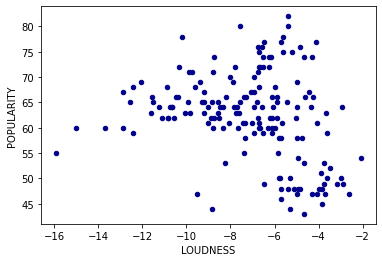

In [16]:
#finding the correlation between popularity and loudness and using a scatterplot to visualize the relationship between the two variables

loudness = df_data_1["LOUDNESS"]
correlation_loudness = popularity.corr(loudness)
print(correlation_loudness)
ax1 = df_data_1.plot.scatter(x = 'LOUDNESS',y = 'POPULARITY',c = 'DarkBlue')

In [32]:
%%sql

/* finding the song for each album that has the highest speechiness */

select t.album, t.name, t.popularity, t.speechiness 
from (
   select album, max(speechiness) as mostspeechy
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.speechiness = x.mostspeechy order by speechiness desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,speechiness
Lover,I Forgot That You Existed,72,0.5190
evermore (deluxe version),closure,62,0.2450
reputation,Dancing With Our Hands Tied,68,0.1960
1989 (Deluxe),Bad Blood,59,0.1900
Red (Deluxe Edition),We Are Never Ever Getting Back Together,65,0.0916
Speak Now (Deluxe Package),Better Than Revenge,49,0.0887
folklore (deluxe version),peace,60,0.0821
Taylor Swift,I'm Only Me When I'm With You,50,0.0646
Fearless (Taylor's Version),Tell Me Why (Taylor’s Version),63,0.0628


0.30886559108673206


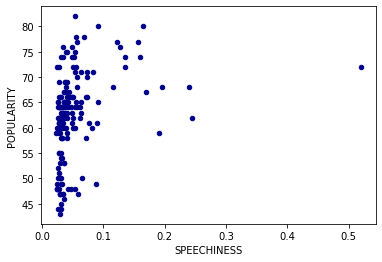

In [18]:
#finding the correlation between popularity and speechiness and using a scatterplot to visualize the relationship between the two variables

speechiness = df_data_1["SPEECHINESS"]
correlation_speechiness = popularity.corr(speechiness)
print(correlation_speechiness)
ax1 = df_data_1.plot.scatter(x = 'SPEECHINESS',y = 'POPULARITY',c = 'DarkBlue')

In [33]:
%%sql

/* finding the song for each album that has the highest valence */

select t.album, t.name, t.popularity, t.valence 
from (
   select album, max(valence) as mostvalence
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.valence = x.mostvalence order by valence desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,valence
1989 (Deluxe),Shake It Off,80,0.9420
Red (Deluxe Edition),Stay Stay Stay,60,0.9280
evermore (deluxe version),closure,62,0.9200
Lover,Paper Rings,76,0.8650
Speak Now (Deluxe Package),The Story Of Us,48,0.8400
Taylor Swift,Picture To Burn,54,0.8210
Fearless (Taylor's Version),Hey Stephen (Taylor’s Version),66,0.7970
folklore (deluxe version),the last great american dynasty,63,0.7010
reputation,Look What You Made Me Do,77,0.5060


0.07094252802172737


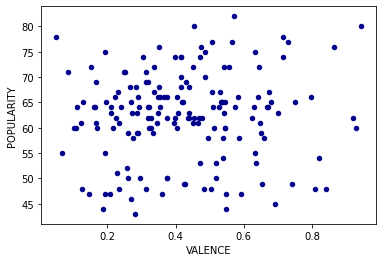

In [19]:
#finding the correlation between popularity and valence and using a scatterplot to visualize the relationship between the two variables

valence = df_data_1["VALENCE"]
correlation_valence = popularity.corr(valence)
print(correlation_valence)
ax1 = df_data_1.plot.scatter(x = 'VALENCE',y = 'POPULARITY',c = 'DarkBlue')

In [34]:
%%sql

/* finding the song for each album that has the highest tempo */

select t.album, t.name, t.popularity, t.tempo 
from (
   select album, max(tempo) as mosttempo
   from SPOTIFY_TAYLORSWIFT group by album
) as x inner join SPOTIFY_TAYLORSWIFT as t on t.album = x.album and t.tempo = x.mosttempo order by tempo desc;

 * ibm_db_sa://nhy87814:***@54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud:32733/BLUDB
Done.


album,name,popularity,tempo
Lover,Soon You’ll Get Better (feat. The Chicks),65,207.476
Speak Now (Deluxe Package),Long Live,47,203.959
Fearless (Taylor's Version),Untouchable (Taylor’s Version),62,200.391
Taylor Swift,Teardrops on My Guitar - Pop Version,48,199.997
1989 (Deluxe),Wonderland,65,184.014
folklore (deluxe version),the lakes - bonus track,65,179.947
reputation,Getaway Car,76,172.054
evermore (deluxe version),champagne problems,69,171.319
Red (Deluxe Edition),Holy Ground,61,157.043


-0.08695625654248672


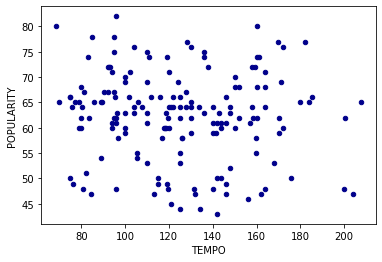

In [20]:
#finding the correlation between popularity and tempo and using a scatterplot to visualize the relationship between the two variables

tempo = df_data_1["TEMPO"]
correlation_tempo = popularity.corr(tempo)
print(correlation_tempo)
ax1 = df_data_1.plot.scatter(x = 'TEMPO',y = 'POPULARITY',c = 'DarkBlue')